In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sqlite3 import connect

In [2]:
from IPython.display import display, HTML
import warnings

In [3]:
display(HTML("<style>.container { width:100% !important; }</style>"))
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format

In [4]:
INPUT = 'przetwarzanie_faktur_zadanie.csv'

In [5]:
CONFIG = 'config.json'

In [6]:
# Get the absolute path of the file within the INPUTS directory
FILE_PATH = os.path.join(os.getcwd(), 'INPUTS', INPUT)

# Print the file path
print(FILE_PATH)

C:\Users\KonuTech\PycharmProjects\yet-another-analysis\INPUTS\przetwarzanie_faktur_zadanie.csv


In [7]:
# Get the absolute path of the config within the CONFIGS directory
CONFIG_PATH = os.path.join(os.getcwd(), 'CONFIGS', CONFIG)

# Print the fileconfig_pathpath
print(CONFIG_PATH)

C:\Users\KonuTech\PycharmProjects\yet-another-analysis\CONFIGS\config.json


In [8]:
with open(CONFIG_PATH, encoding='utf-8') as f:
    CONFIG = json.load(f)

In [9]:
# INDEX_COL = CONFIG["INPUTS"]["INDEX_COLUMNS"]
SEP = CONFIG["INPUTS"]["SEPARATOR"]
# DECIMAL = CONFIG["INPUTS"]["DECIMAL"]
ENCODING = CONFIG["INPUTS"]["ENCODING"]
DATE_COLUMNS = CONFIG["INPUTS"]["DATE_COLUMNS"]
# FLOAT_PRECISION = CONFIG["INPUTS"]["FLOAT_PRECISION"]
DTYPE = CONFIG["INPUTS"]["DTYPE"]
COLUMNS_WITH_NAN_VALUES = CONFIG["INPUTS"]["COLUMNS_WITH_NAN_VALUES"]
# # X_ORDER = CONFIG["X_ORDER"]
HUE_ORDER = CONFIG["HUE_ORDER"]
COL_ORDER = CONFIG["COL_ORDER"]
WEEKDAY_ORDER = CONFIG["WEEKDAY_ORDER"]

In [10]:
# INDEX_COL

In [11]:
SEP

';'

In [12]:
ENCODING

'utf-8'

In [13]:
DATE_COLUMNS

['StartDateTimeUtc']

In [14]:
DTYPE

{'ID_Process': 'object',
 'ID_Document': 'object',
 'Queue': 'object',
 'ProcessingDuration': 'int64',
 'Duration': 'int64',
 'InputPageCount': 'int64',
 'MessagesInQueue': 'int64',
 'Retries': 'int64'}

In [15]:
COLUMNS_WITH_NAN_VALUES

['Duration']

In [16]:
HUE_ORDER

['potok_0-0',
 'potok_1-1',
 'potok_1-2',
 'potok_2-1',
 'potok_2-2',
 'potok_3-1',
 'potok_3-2']

In [17]:
COL_ORDER

['potok_0', 'potok_1', 'potok_2', 'potok_3']

In [18]:
WEEKDAY_ORDER

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [19]:
df = pd.read_csv(
    filepath_or_buffer=FILE_PATH,
#     index_col=INDEX_COL,
    sep=SEP,
    encoding=ENCODING,
    engine="c",
    low_memory=False,
    parse_dates=DATE_COLUMNS,
#     dtype=DTYPE
)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121190 entries, 0 to 1121189
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ID_Process          1121190 non-null  int64         
 1   Queue               1107824 non-null  object        
 2   ID_Document         1107824 non-null  float64       
 3   ProcessingDuration  1085406 non-null  float64       
 4   Duration            1080011 non-null  float64       
 5   InputPageCount      1085406 non-null  float64       
 6   MessagesInQueue     1121190 non-null  int64         
 7   Retries             1121190 non-null  int64         
 8   StartDateTimeUtc    1121190 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 77.0+ MB


In [21]:
df.head()

,ID_Process,Queue,ID_Document,ProcessingDuration,Duration,InputPageCount,MessagesInQueue,Retries,StartDateTimeUtc
0,2299375,potok_1-1,2270386.00,2583.00,2940.00,1.00,4,0,2023-03-02 12:47:31.880
1,202658,potok_1-1,245850.00,5486.00,6626.00,2.00,6,0,2023-02-10 08:33:17.910
2,2323656,potok_3-1,2304772.00,2079.00,2606.00,1.00,7,0,2023-03-03 13:35:13.690
3,115622,potok_1-2,165259.00,2915.00,3228.00,2.00,1,0,2023-02-15 14:18:19.550
4,343261,potok_1-1,237985.00,2480.00,3114.00,1.00,9,0,2023-02-15 07:26:05.317


In [22]:
df.tail()

,ID_Process,Queue,ID_Document,ProcessingDuration,Duration,InputPageCount,MessagesInQueue,Retries,StartDateTimeUtc
1121185,2627984,potok_3-2,2571026.00,3040.00,3683.00,1.00,2,0,2023-03-13 19:29:07.610
1121186,2492632,potok_3-1,2457336.00,3127.00,3425.00,1.00,6,0,2023-03-09 12:50:04.387
1121187,2771801,potok_3-2,2812898.00,298.00,715.00,2.00,0,0,2023-03-24 07:14:42.087
1121188,2343195,potok_1-2,2328046.00,9247.00,9689.00,1.00,4,0,2023-03-05 21:14:38.007
1121189,272829,potok_1-2,11148.00,74.00,10153.00,3.00,0,0,2023-02-13 10:47:07.257


In [23]:
df.describe()

,ID_Process,ID_Document,ProcessingDuration,Duration,InputPageCount,MessagesInQueue,Retries
count,1121190.00,1107824.00,1085406.00,1080011.00,1085406.00,1121190.00,1121190.00
mean,1623558.71,1616588.28,4187.53,25350.38,1.21,9.01,0.00
std,1131326.47,1122477.06,5195.52,323548.18,2.13,52.46,0.09
min,1.00,3.00,34.00,271.00,1.00,0.00,0.00
25%,280298.25,276786.75,2264.00,2714.00,1.00,1.00,0.00
50%,2311131.50,2295873.50,2973.00,3707.00,1.00,3.00,0.00
75%,2591428.75,2572823.25,4841.00,7064.00,1.00,7.00,0.00
max,2883900.00,2861842.00,1422420.00,45199914.00,736.00,2018.00,9.00


In [24]:
df.isnull().sum()

ID_Process                0
Queue                 13366
ID_Document           13366
ProcessingDuration    35784
Duration              41179
InputPageCount        35784
MessagesInQueue           0
Retries                   0
StartDateTimeUtc          0
dtype: int64

## preprocessing

## ON/OFF -- Filling NaN

In [25]:
# df['ProcessingDuration'].fillna(1e-1000, inplace=True)
# df['Duration'].fillna(1e-1000, inplace=True)
# df['InputPageCount'].fillna(0, inplace=True)

In [26]:
# Convert the time values to minutes, hours, and days
df['ProcessingDuration_sec'] = df['ProcessingDuration'] / 1000
# df['ProcessingDuration_min'] = df['ProcessingDuration'] / (1000 * 60)
# df['ProcessingDuration_hours'] = df['ProcessingDuration'] / (1000 * 60 * 60)
# df['ProcessingDuration_days'] = df['ProcessingDuration'] / (1000 * 60 * 60 * 24)

In [27]:
# Convert the time values to minutes, hours, and days
df['Duration_sec'] = df['Duration'] / 1000
# df['Duration_min'] = df['Duration'] / (1000 * 60)
# df['Duration_hours'] = df['Duration'] / (1000 * 60 * 60)
# df['Duration_days'] = df['Duration'] / (1000 * 60 * 60 * 24)

In [28]:
# Create a FunctionTransformer object with a logarithmic transformation function
# log_transformer = FunctionTransformer(np.log1p)
log_transformer = FunctionTransformer(np.log10)

# Apply the logarithmic transformation to the "Sales" column
df['Log_ProcessingDuration'] = log_transformer.transform(df[['ProcessingDuration']] + 1)
df['Log_ProcessingDuration_sec'] = log_transformer.transform(df[['ProcessingDuration_sec']] + 1)
# df['Log_ProcessingDuration_min'] = log_transformer.transform(df[['ProcessingDuration_min']] + 1)
# df['Log_ProcessingDuration_hours'] = log_transformer.transform(df[['ProcessingDuration_hours']] + 1)
# df['Log_ProcessingDuration_days'] = log_transformer.transform(df[['ProcessingDuration_days']] + 1)

df['Log_Duration'] = log_transformer.transform(df[['Duration']] + 1)
df['Log_Duration_sec'] = log_transformer.transform(df[['Duration_sec']] + 1)
# df['Log_Duration_min'] = log_transformer.transform(df[['Duration_min']] + 1)
# df['Log_Duration_hours'] = log_transformer.transform(df[['Duration_hours']] + 1)
# df['Log_Duration_days'] = log_transformer.transform(df[['Duration_days']] + 1)

In [29]:
df['Queue'] = df['Queue'].fillna('Potok_0-0')

In [30]:
df[['potok']] = 'potok_' + df['Queue'].str.extract(r'^potok_(\d+)')

In [31]:
for i, v in enumerate(sorted(df["Queue"].unique())):
    print("POTOK:", i, v)
    print(df[df["Queue"] == v].isnull().sum(), "\n")

POTOK: 0 Potok_0-0
ID_Process                        0
Queue                             0
ID_Document                   13366
ProcessingDuration                0
Duration                        530
InputPageCount                    0
MessagesInQueue                   0
Retries                           0
StartDateTimeUtc                  0
ProcessingDuration_sec            0
Duration_sec                    530
Log_ProcessingDuration            0
Log_ProcessingDuration_sec        0
Log_Duration                    530
Log_Duration_sec                530
potok                         13366
dtype: int64 

POTOK: 1 potok_1-1
ID_Process                        0
Queue                             0
ID_Document                       0
ProcessingDuration            10562
Duration                      11557
InputPageCount                10562
MessagesInQueue                   0
Retries                           0
StartDateTimeUtc                  0
ProcessingDuration_sec        10562
Duration_se

In [32]:
# Convert to datetime
df['date_time'] = pd.to_datetime(df['StartDateTimeUtc'])

# Extract date-related columns
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['week'] = df['date_time'].dt.week
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour
df['minute'] = df['date_time'].dt.minute
df['second'] = df['date_time'].dt.second
df['microsecond'] = df['date_time'].dt.microsecond
# df['weekday'] = df['date_time'].dt.weekday
# Create a new column indicating the weekday (Monday is 1st, Sunday is 7th)
df['weekday'] = df['date_time'].dt.weekday.apply(lambda x: x + 1 if x != 6 else 7)
df['weekday_name'] = df['date_time'].dt.strftime('%A')
df['month_name'] = df['date_time'].dt.strftime('%B')

# Create flag for typical working hours (9 AM to 5 PM on weekdays)
df['working_hours'] = np.where((df['weekday'].isin([1,2,3,4,5])) & (df['hour'] >= 9) & (df['hour'] < 17), 1, 0)

In [33]:
df[df['weekday'].isin([6,7])].head()

,ID_Process,Queue,ID_Document,ProcessingDuration,Duration,InputPageCount,MessagesInQueue,Retries,StartDateTimeUtc,ProcessingDuration_sec,...,week,day,hour,minute,second,microsecond,weekday,weekday_name,month_name,working_hours
19,2347610,potok_1-2,2323521.00,5174.00,5681.00,1.00,1,0,2023-03-05 11:53:10.883,5.17,...,9,5,11,53,10,883000,7,Sunday,March,0
46,303874,potok_1-1,13020.00,2331.00,2845.00,1.00,4,0,2023-02-19 15:10:10.867,2.33,...,7,19,15,10,10,867000,7,Sunday,February,0
48,785128,potok_3-2,693766.00,6149.00,7274.00,1.00,10,0,2023-02-05 19:47:58.283,6.15,...,5,5,19,47,58,283000,7,Sunday,February,0
62,129788,potok_1-2,6491.00,10984.00,44663.00,1.00,19,0,2023-02-19 03:27:32.237,10.98,...,7,19,3,27,32,237000,7,Sunday,February,0
85,2791819,potok_3-1,2683288.00,4195.00,4518.00,1.00,1,0,2023-03-19 20:20:47.470,4.20,...,11,19,20,20,47,470000,7,Sunday,March,0


## samplowanie

In [34]:
df_sample = df.sample(frac=0.01, replace=False)
df_sample

,ID_Process,Queue,ID_Document,ProcessingDuration,Duration,InputPageCount,MessagesInQueue,Retries,StartDateTimeUtc,ProcessingDuration_sec,...,week,day,hour,minute,second,microsecond,weekday,weekday_name,month_name,working_hours
784076,2433599,potok_1-2,2379361.00,3627.00,6435.00,1.00,22,0,2023-03-08 07:33:20.420,3.63,...,10,8,7,33,20,420000,3,Wednesday,March,0
182869,114393,potok_1-2,134815.00,3089.00,3834.00,1.00,0,0,2023-02-14 15:19:49.037,3.09,...,7,14,15,19,49,37000,2,Tuesday,February,1
762162,2456899,potok_3-2,2536324.00,2682.00,3214.00,1.00,1,0,2023-03-16 06:08:11.530,2.68,...,11,16,6,8,11,530000,4,Thursday,March,0
685165,2792034,potok_3-2,2840194.00,2808.00,12830.00,1.00,1,0,2023-03-23 12:12:21.397,2.81,...,12,23,12,12,21,397000,4,Thursday,March,1
602635,2579242,potok_3-1,2501516.00,2329.00,2651.00,1.00,2,0,2023-03-13 12:28:05.207,2.33,...,11,13,12,28,5,207000,1,Monday,March,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448076,222565,potok_1-1,63910.00,2734.00,3068.00,1.00,1,0,2023-02-20 12:55:49.150,2.73,...,8,20,12,55,49,150000,1,Monday,February,1
806847,293887,potok_1-1,303901.00,3908.00,4559.00,1.00,5,0,2023-02-07 08:03:40.970,3.91,...,6,7,8,3,40,970000,2,Tuesday,February,0
553342,2560162,potok_1-2,2560894.00,127.00,789.00,1.00,3,0,2023-03-10 09:51:57.770,0.13,...,10,10,9,51,57,770000,5,Friday,March,1
1099799,2760761,potok_3-1,2708192.00,4994.00,5626.00,1.00,11,0,2023-03-17 20:20:20.473,4.99,...,11,17,20,20,20,473000,5,Friday,March,0


In [35]:
df_sample.describe()

,ID_Process,ID_Document,ProcessingDuration,Duration,InputPageCount,MessagesInQueue,Retries,ProcessingDuration_sec,Duration_sec,Log_ProcessingDuration,...,year,month,week,day,hour,minute,second,microsecond,weekday,working_hours
count,11212.00,11083.00,10821.00,10803.00,10821.00,11212.00,11212.00,10821.00,10803.00,10821.00,...,11212.00,11212.00,11212.00,11212.00,11212.00,11212.00,11212.00,11212.00,11212.00,11212.00
mean,1615439.65,1608947.71,4149.15,22383.44,1.20,9.06,0.00,4.15,22.38,3.43,...,2023.00,2.54,8.81,12.93,12.00,29.60,29.57,501001.34,3.29,0.61
std,1130326.86,1120912.91,4546.54,290452.48,1.07,54.22,0.06,4.55,290.45,0.50,...,0.00,0.50,2.33,7.39,3.99,17.14,17.25,290054.43,1.74,0.49
min,6.00,96.00,48.00,304.00,1.00,0.00,0.00,0.05,0.30,1.69,...,2023.00,2.00,5.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,278199.75,271873.00,2270.00,2720.50,1.00,1.00,0.00,2.27,2.72,3.36,...,2023.00,2.00,7.00,7.00,9.00,15.00,15.00,247000.00,2.00,0.00
50%,2308555.00,2293551.00,2977.00,3705.00,1.00,3.00,0.00,2.98,3.71,3.47,...,2023.00,3.00,9.00,13.00,11.00,30.00,30.00,503000.00,3.00,1.00
75%,2582010.75,2566596.00,4804.00,6908.00,1.00,7.00,0.00,4.80,6.91,3.68,...,2023.00,3.00,11.00,17.00,14.00,44.00,45.00,753000.00,5.00,1.00
max,2883900.00,2861790.00,133133.00,9877213.00,38.00,2002.00,2.00,133.13,9877.21,5.12,...,2023.00,3.00,13.00,31.00,23.00,59.00,59.00,997000.00,7.00,1.00


# CHARTS

## HISTOGRAMS

In [ ]:
# Create a histogram with groupings based on Order Year
g = sns.displot(
    data=df_sample,
    x="Log_Duration_sec",
    hue="Queue",
    kde=True,
    hue_order=HUE_ORDER,
    col="potok",
    col_order=COL_ORDER,
    aspect=.85
)

# Customize the plot
# g.set(xlim=(0, 6), ylim=(0, 350), xlabel="Log_ProcessingDuration_min", ylabel="Frequency")
g.set(xticks=[0, 1, 2, 3, 4], xticklabels=["0", "10", "100", "1000", "1000"])
g.fig.suptitle(f"[Log_Duration_sec]", fontsize=14, y=1.05)
# Show the plot
plt.show()

In [ ]:
# Create a histogram with groupings based on Order Year
g = sns.displot(
    data=df_sample,
    x="Log_Duration_sec",
    hue="weekday_name",
    kde=True,
    hue_order=WEEKDAY_ORDER,
    col="potok",
    col_order=COL_ORDER,
    aspect=.85    
)

# Customize the plot
# g.set(xlim=(0, 6), ylim=(0, 350), xlabel="Log_ProcessingDuration_min", ylabel="Frequency")
g.set(xticks=[0, 1, 2], xticklabels=["0", "10", "100"])
g.fig.suptitle(f"[Log_Duration_sec]", fontsize=14, y=1.05)
# Show the plot
plt.show()

In [ ]:
# Create a histogram with groupings based on Order Year
for i, v in enumerate(sorted(df["Queue"].unique())):
    print(v)
    g = sns.displot(
        data=df_sample[df_sample["Queue"] == v],
        x="Log_Duration_sec",
        hue="working_hours",
        kde=True,
#         hue_order=HUE_ORDER,
        col="weekday_name",
        col_order=WEEKDAY_ORDER,
        aspect=.85,
        multiple="stack"
    )

    # Customize the plot
    g.set(xlim=(0, 3), ylim=(0, 50), xlabel="Log_Duration_sec", ylabel="Frequency")
    g.set(xticks=[0, 1, 2], xticklabels=["0", "10", "100"])
    g.fig.suptitle(f"[Log_Duration_sec]", fontsize=14, y=1.05)
    # Show the plot
    plt.show()

In [ ]:
# Create a histogram with groupings based on Order Year
for i, v in enumerate(sorted(df["weekday"].unique())):
    print(v)
    g = sns.displot(
        data=df_sample[df_sample["weekday"] == v],
        x="Log_Duration_sec",
        hue="working_hours",
        kde=True,
#         hue_order=WEEKDAY_ORDER,
        col="Queue",
        col_order=HUE_ORDER,
        aspect=.85,
        multiple="stack"
    )

    # Customize the plot
    g.set(xlim=(0, 3), ylim=(0, 100), xlabel="Log_Duration_sec", ylabel="Frequency")
    g.set(xticks=[0, 1, 2], xticklabels=["0", "10", "100"])
    g.fig.suptitle(f"[Log_Duration_sec]", fontsize=14, y=1.05)
    # Show the plot
    plt.show()

## BOX PLOTS

In [ ]:
# Create a box plot with groupings based on Order Year
g = sns.boxplot(data=df_sample, x="weekday_name", y="Log_Duration_sec", hue="working_hours", order=WEEKDAY_ORDER)

# Customize the plot
g.set(ylim=(-1, 5), xlabel="weekday_name", ylabel="Log_Duration_sec", title="Log_Duration_sec by weekday_name")

g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
# Move the legend outside the chart box
# Add horizontal lines at each ytick
yticks = plt.yticks()[0]
for ytick in yticks:
    plt.axhline(ytick, color='gray', linestyle='--')

# Move the legend outside the chart box
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
for i, v in enumerate(sorted(df["month_name"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_sample[df_sample["month_name"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_sample[df_sample["month_name"] == v], x="weekday_name", y="Log_Duration_sec", hue="working_hours", order=WEEKDAY_ORDER)

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Weekday", ylabel="Log_Duration_sec", title=f"{v} - Log_Duration_sec by weekday_name")
        g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
for i, v in enumerate(sorted(df["week"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_sample[df_sample["week"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_sample[df_sample["week"] == v], x="weekday_name", y="Log_Duration_sec", hue="working_hours", order=WEEKDAY_ORDER)

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Weekday", ylabel="Log_Duration_sec", title=f"Week {v} - Log_Duration_sec by weekday_name")
        g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
for i, v in enumerate(sorted(df["week"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_sample[df_sample["week"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_sample[df_sample["week"] == v], x="weekday_name", y="Log_Duration_sec", order=WEEKDAY_ORDER, hue="Queue", hue_order=HUE_ORDER)

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Weekday", ylabel="Log_Duration_sec", title=f"Week {v} - Log_Duration_sec by weekday_name")
        g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
for i, v in enumerate(sorted(df["week"].unique())):
    print(v)

    # Set the figure size
    plt.figure(figsize=(16, 6))

    # Check if dataframe is not empty before creating the boxplot
    if not df_sample[df_sample["week"] == v].empty:
        # Create a box plot with groupings based on Order Year
        g = sns.boxplot(data=df_sample[df_sample["week"] == v], x="weekday_name", y="Log_Duration_sec", order=WEEKDAY_ORDER, hue="working_hours")

        # Customize the plot
        g.set(ylim=(-1, 5), xlabel="Weekday", ylabel="Log_Duration_sec", title=f"Week {v} - Log_Duration_sec by weekday_name")
        g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
for i, v in enumerate(sorted(df["week"].unique())):
    print(v)
    if not df_sample[df_sample["week"] == v].empty:
        g = sns.catplot(
            data=df_sample[df_sample["week"] == v],
            kind="box",
            x="hour",
#             order=WEEKDAY_ORDER,
            y="Log_Duration_sec",
#             hue="hour",
            col="weekday_name",
            col_order=WEEKDAY_ORDER,
            row_order=sorted(df_sample["hour"].unique()),
            aspect=2, height=1.5, sharey=False, legend_out=False,
        )
#         g.set(yticks=[0, 1, 2, 3, 4], yticklabels=["0", "10 sec", "100 sec - prawie 2 min", "1 000 sec- prawie 17 min", "10 000 sec- prawie 3 h"])
        # Add horizontal lines at each ytick
        yticks = plt.yticks()[0]
        for ytick in yticks:
            plt.axhline(ytick, color='gray', linestyle='--')
        # Move the legend outside the chart box
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## SWARM PLOTS

In [ ]:
df_sample = df.sample(frac=0.005, replace=False)
df_sample

In [ ]:
g = sns.catplot(
    data=df_sample, kind="swarm",
    x="weekday_name", order=WEEKDAY_ORDER, y="Log_Duration_sec", hue="Queue", hue_order=sorted(df["Queue"].unique()), col="week", aspect=.85
)
g.set(ylim=(0, 3))
g.fig.suptitle(f"[Winsorized Sales]", fontsize=14, y=1.05)

In [ ]:
for i, v in enumerate(sorted(df["week"].unique())):
    print(v)
    g = sns.catplot(
        data=df_sample,
        kind="swarm",
#         x="hour",
#         order=sorted(df["hour"].unique()),
        x="weekday_name",
        order=WEEKDAY_ORDER,
        y="Log_Duration_sec",
#         col="weekday_name",
#         col_order=sorted(df["weekday_name"].unique()),
        col="hour",
        col_order=sorted(df["hour"].unique()),
        hue="Queue",
        hue_order=sorted(df["Queue"].unique()),
        aspect=.85
    )
    g.set(ylim=(0, 3))
    g.fig.suptitle(f"Week: {v}", fontsize=14, y=1.05)

In [ ]:
df_sample

## LINE PLOTS

## Months X Days

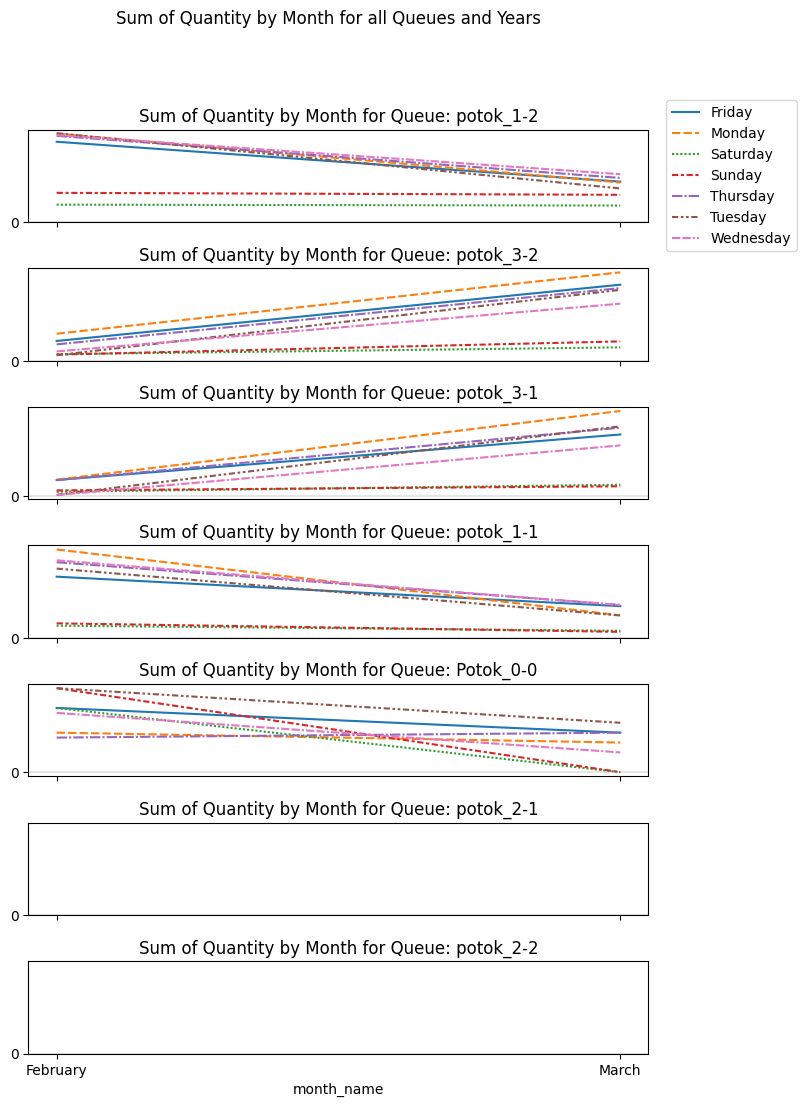

In [57]:
# Get the unique values in the "Queue" column
queues = df_sample["Queue"].unique()

# Create a subplot grid to accommodate all the line plots
fig, axs = plt.subplots(nrows=len(queues), ncols=1, figsize=(8, 12), sharex=True)

# Iterate over the queues and create a line plot for each queue
for i, queue in enumerate(queues):
    # Filter the data to include only the current queue
    queue_data = df_sample[df_sample["Queue"] == queue]
    
    grouped_data = queue_data.groupby(['Queue', 'month_name', 'weekday_name']).agg(
    quantity=('Log_Duration_sec', 'count'),
    Mean_Log_Duration_sec=('Log_Duration_sec', 'mean'),
    Sum_Log_Duration_sec=('Log_Duration_sec', 'sum')
    ).reset_index()

    # Pivot the data to create a table with months as rows and years as columns
#     pivot_data = pd.pivot_table(queue_data, values="Sum_Log_Duration_sec", index="month_name", columns="year", aggfunc=np.sum)
    agg_data_pivot = pd.pivot_table(
        grouped_data,
        values='quantity',
        index=['month_name'],
        columns=['weekday_name'],
        aggfunc=sum,
        fill_value=0
    )

    # Plot the data as a line plot
    ax = sns.lineplot(data=agg_data_pivot, ax=axs[i])

    # Set the title and y-axis ticks for the current subplot
    ax.set_title(f"Sum of Quantity by Month for Queue: {queue}")
    ax.set_yticks(list(range(0, 100, 100)))
    for y in range(0, 100, 100):
        ax.axhline(y=y, linestyle='-', color='gray', alpha=0.2)

    # Display legend only for the first plot
    if i == 0:
        ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    else:
        ax.legend().set_visible(False)

    # Increase the spacing between subplots
    plt.subplots_adjust(hspace=0.5)

# Add a main title for the entire figure
fig.suptitle("Sum of Quantity by Month for all Queues and Years")

# Show the plot
plt.show()


## Months X Hours

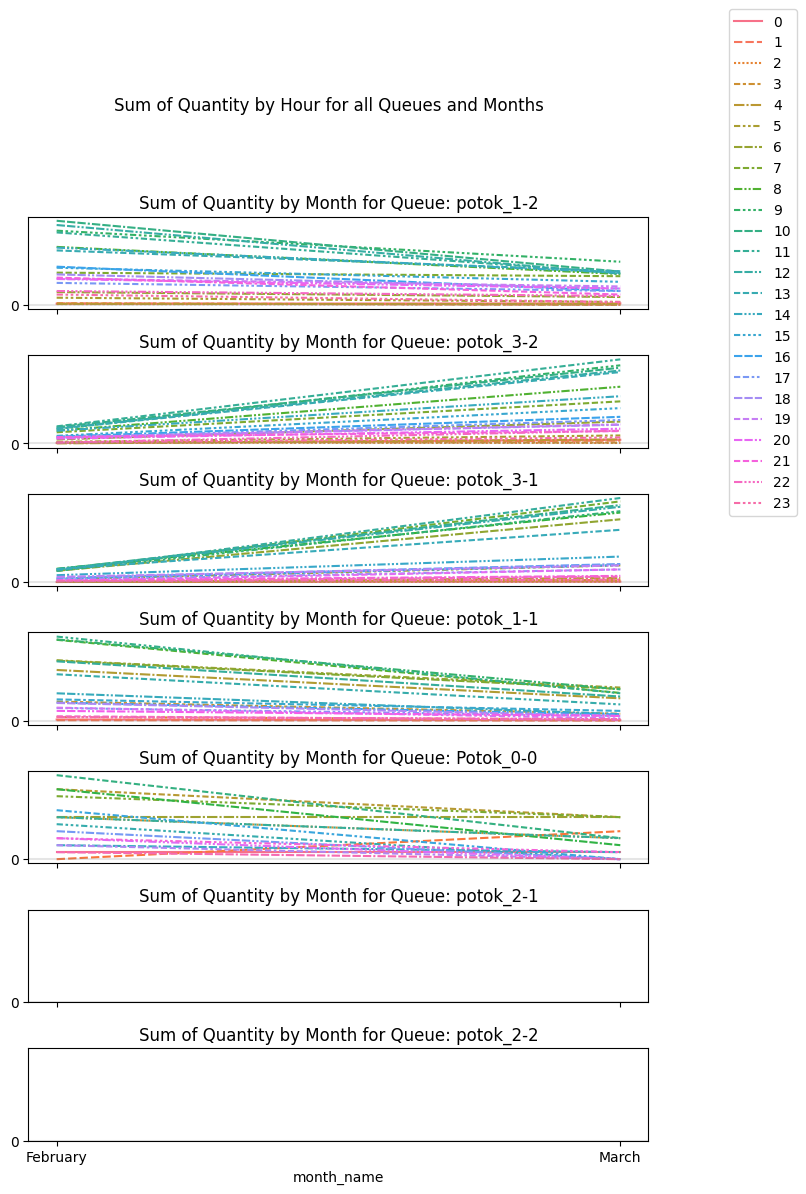

In [54]:
# Get the unique values in the "Queue" column
queues = df_sample["Queue"].unique()

# Create a subplot grid to accommodate all the line plots
fig, axs = plt.subplots(nrows=len(queues), ncols=1, figsize=(8, 12), sharex=True)

# Iterate over the queues and create a line plot for each queue
for i, queue in enumerate(queues):
    # Filter the data to include only the current queue
    queue_data = df_sample[df_sample["Queue"] == queue]
    
    grouped_data = queue_data.groupby(['Queue', 'month_name', 'hour']).agg(
    quantity=('Log_Duration_sec', 'count'),
    Mean_Log_Duration_sec=('Log_Duration_sec', 'mean'),
    Sum_Log_Duration_sec=('Log_Duration_sec', 'sum')
    ).reset_index()

    # Pivot the data to create a table with months as rows and years as columns
#     pivot_data = pd.pivot_table(queue_data, values="Sum_Log_Duration_sec", index="month_name", columns="year", aggfunc=np.sum)
    agg_data_pivot = pd.pivot_table(
        grouped_data,
        values='quantity',
        index=['month_name'],
        columns=['hour'],
        aggfunc=sum,
        fill_value=0
    )

    # Plot the data as a line plot
    ax = sns.lineplot(data=agg_data_pivot, ax=axs[i])

    # Set the title and y-axis ticks for the current subplot
    ax.set_title(f"Sum of Quantity by Month for Queue: {queue}")
    ax.set_yticks(list(range(0, 100, 100)))
    for y in range(0, 100, 100):
        ax.axhline(y=y, linestyle='-', color='gray', alpha=0.2)

    # Display legend only for the first plot
    if i == 0:
        ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    else:
        ax.legend().set_visible(False)

    # Increase the spacing between subplots
    plt.subplots_adjust(hspace=0.5)

# Add a main title for the entire figure
fig.suptitle("Sum of Quantity by Hour for all Queues and Months")

# Show the plot
plt.show()


## Days X Hours

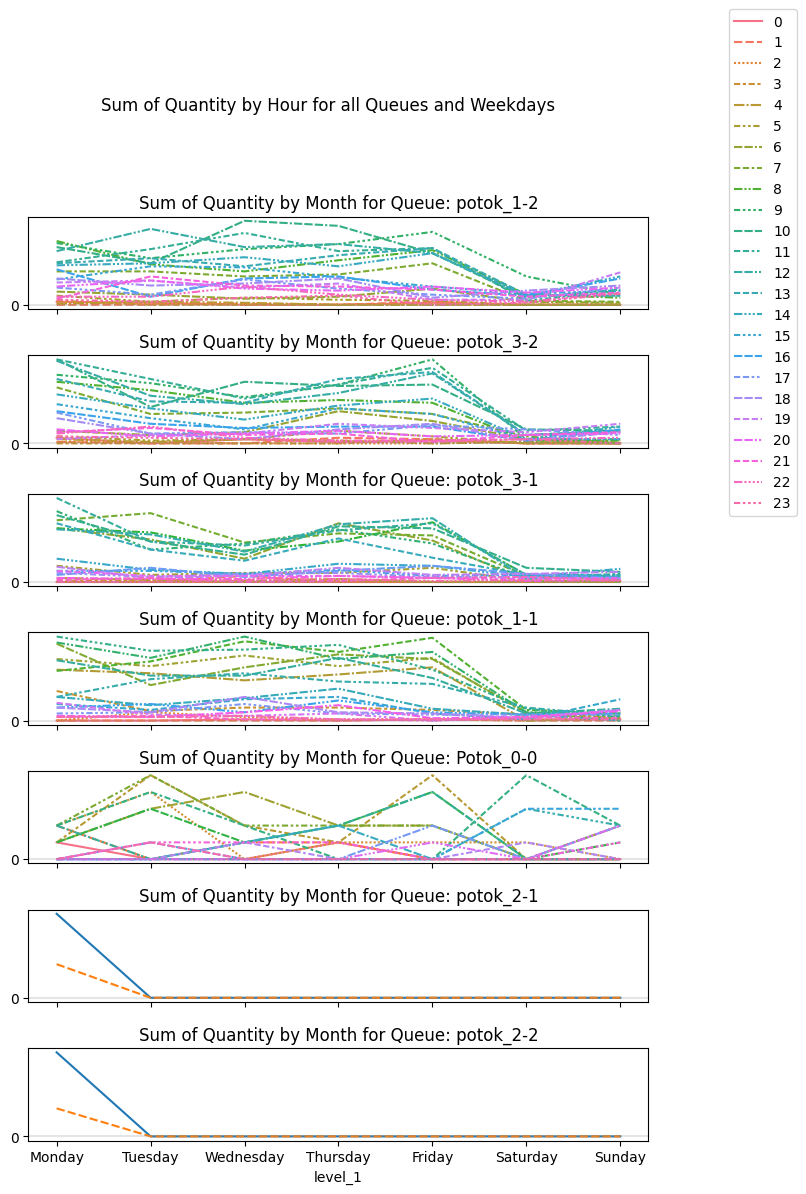

In [55]:
# Define the desired order of weekdays
weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday"
]

# Get the unique values in the "Queue" column
queues = df_sample["Queue"].unique()

# Create a subplot grid to accommodate all the line plots
fig, axs = plt.subplots(nrows=len(queues), ncols=1, figsize=(8, 12), sharex=True)

# Iterate over the queues and create a line plot for each queue
for i, queue in enumerate(queues):
    # Filter the data to include only the current queue
    queue_data = df_sample[df_sample["Queue"] == queue]

    # Convert "weekday_name" to categorical variable with the desired order
    weekday_cat = pd.Categorical(
        queue_data["weekday_name"],
        categories=weekday_order,
        ordered=True
    )

    # Group the data by "Queue", "weekday_name", and "hour", with the desired weekday order
    grouped_data = queue_data.groupby(['Queue', weekday_cat, 'hour']).agg(
        quantity=('Log_Duration_sec', 'count'),
        Mean_Log_Duration_sec=('Log_Duration_sec', 'mean'),
        Sum_Log_Duration_sec=('Log_Duration_sec', 'sum')
    ).reset_index()
    
    # Sort the data by weekday_name using the weekday_order
#     grouped_data = grouped_data.reindex(weekday_order, level=1)
    
    # Pivot the data to create a table with months as rows and years as columns
    agg_data_pivot = pd.pivot_table(
        grouped_data,
        values='quantity',
        index=['level_1'],
        columns=['hour'],
        aggfunc=sum,
        fill_value=0
    )

    # Plot the data as a line plot
    ax = sns.lineplot(data=agg_data_pivot, ax=axs[i])

    # Set the title and y-axis ticks for the current subplot
    ax.set_title(f"Sum of Quantity by Month for Queue: {queue}")
    ax.set_yticks(list(range(0, 100, 100)))
    for y in range(0, 100, 100):
        ax.axhline(y=y, linestyle='-', color='gray', alpha=0.2)

    # Display legend only for the first plot
    if i == 0:
        ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    else:
        ax.legend().set_visible(False)

    # Increase the spacing between subplots
    plt.subplots_adjust(hspace=0.5)

# Add a main title for the entire figure
fig.suptitle("Sum of Quantity by Hour for all Queues and Weekdays")

# Show the plot
plt.show()
